# Positive Predictive Value (PPV) and Negative Predictive Value (NPV) Analysis

## Introduction
**Positive Predictive Value (PPV)** and **Negative Predictive Value (NPV)** are crucial metrics in classification, particularly in diagnostic testing, as they represent the probability of a true result given a test result.

*   **PPV** (also known as Precision): The probability that a subject with a positive test result truly has the condition.
    $$PPV = P(\text{Condition} \mid \text{Test Positive}) = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}$$
*   **NPV**: The probability that a subject with a negative test result truly does not have the condition.
    $$NPV = P(\text{No Condition} \mid \text{Test Negative}) = \frac{\text{True Negatives}}{\text{True Negatives} + \text{False Negatives}}$$

## Features to Look Out For in PPV and NPV Graphs (vs. Prevalence)

Unlike Sensitivity and Specificity, which are intrinsic properties of a test, **PPV and NPV are heavily dependent on the prevalence of the condition in the population** (the pre-test probability). The graph below illustrates this critical relationship for a test with fixed Sensitivity and Specificity.

1.  **PPV's Dependence on Prevalence and Specificity:**
    *   **As Prevalence increases, PPV increases.** A positive test result is more likely to be a true positive in a population where the condition is common.
    *   **PPV is highly influenced by Specificity.** In low-prevalence settings, a small drop in specificity (leading to more False Positives) causes a dramatic drop in PPV.
2.  **NPV's Dependence on Prevalence and Sensitivity:**
    *   **As Prevalence increases, NPV decreases.** In a population where the condition is common, a negative test result is less reliable.
    *   **NPV is highly influenced by Sensitivity.** A highly sensitive test (few False Negatives) maintains a high NPV across a wider range of prevalences.
3.  **The Crossover Point:** The point where **PPV = NPV** often occurs around the prevalence where the test's Sensitivity equals its Specificity (though not exactly, as the formulas are non-linear).


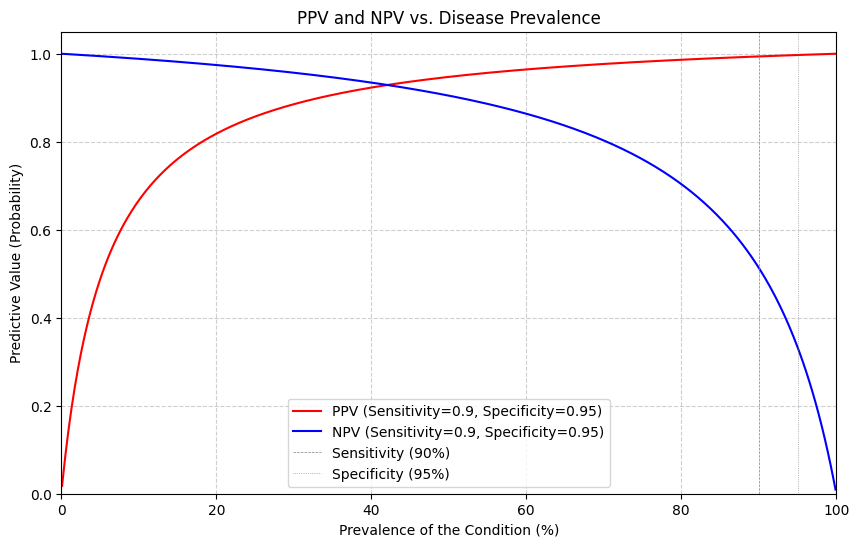

--- Key Observations from the Graph ---
1. Low Prevalence (e.g., 1%): PPV is low (0.15) and NPV is high (1.00). This is because in a rare disease, most positive tests are False Positives due to imperfect specificity.
2. High Prevalence (e.g., 50%): PPV is high (0.95) and NPV is low (0.90).


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the fixed performance metrics of our hypothetical test
SENSITIVITY = 0.90  # True Positive Rate
SPECIFICITY = 0.95  # True Negative Rate

# Function to calculate PPV and NPV using Bayes' Theorem
def calculate_predictive_values(prevalence, sens, spec):
    # Note: P(D) = prevalence
    # P(T+|D) = sens, P(T-|D') = spec
    
    # True Positive Rate: TP = sens * P(D)
    # False Positive Rate: FP = (1 - spec) * P(D') = (1 - spec) * (1 - prevalence)
    # False Negative Rate: FN = (1 - sens) * P(D)
    # True Negative Rate: TN = spec * P(D') = spec * (1 - prevalence)
    
    # PPV = TP / (TP + FP)
    denominator_ppv = (sens * prevalence) + ((1 - spec) * (1 - prevalence))
    ppv = (sens * prevalence) / denominator_ppv
    
    # NPV = TN / (TN + FN)
    denominator_npv = (spec * (1 - prevalence)) + ((1 - sens) * prevalence)
    npv = (spec * (1 - prevalence)) / denominator_npv
    
    return ppv, npv

# Generate a range of prevalence values from 0.001 to 0.999
prevalences = np.linspace(0.001, 0.999, 500)

# Calculate PPV and NPV for each prevalence
ppvs = []
npvs = []
for p in prevalences:
    ppv, npv = calculate_predictive_values(p, SENSITIVITY, SPECIFICITY)
    ppvs.append(ppv)
    npvs.append(npv)

# Plotting the curves
plt.figure(figsize=(10, 6))
plt.plot(prevalences * 100, ppvs, label=f'PPV (Sensitivity={SENSITIVITY}, Specificity={SPECIFICITY})', color='red')
plt.plot(prevalences * 100, npvs, label=f'NPV (Sensitivity={SENSITIVITY}, Specificity={SPECIFICITY})', color='blue')
plt.axvline(x=SENSITIVITY * 100, color='gray', linestyle='--', linewidth=0.5, label='Sensitivity (90%)')
plt.axvline(x=SPECIFICITY * 100, color='grey', linestyle=':', linewidth=0.5, label='Specificity (95%)')

plt.title('PPV and NPV vs. Disease Prevalence')
plt.xlabel('Prevalence of the Condition (%)')
plt.ylabel('Predictive Value (Probability)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.xlim(0, 100)
plt.ylim(0, 1.05)
plt.show()

print("--- Key Observations from the Graph ---")
print(f"1. Low Prevalence (e.g., 1%): PPV is low ({calculate_predictive_values(0.01, SENSITIVITY, SPECIFICITY)[0]:.2f}) and NPV is high ({calculate_predictive_values(0.01, SENSITIVITY, SPECIFICITY)[1]:.2f}). This is because in a rare disease, most positive tests are False Positives due to imperfect specificity.")
print(f"2. High Prevalence (e.g., 50%): PPV is high ({calculate_predictive_values(0.5, SENSITIVITY, SPECIFICITY)[0]:.2f}) and NPV is low ({calculate_predictive_values(0.5, SENSITIVITY, SPECIFICITY)[1]:.2f}).")
